In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df = pd.read_csv('placement.csv')
print(df.shape)

df.sample(6)

(1000, 3)


,cgpa,placement_exam_marks,placed
34,8.15,9.0,0
965,7.37,52.0,1
669,6.94,8.0,1
676,6.73,21.0,1
312,7.02,55.0,1
141,7.19,18.0,0


In [107]:
df.columns

Index(['cgpa', 'placement_exam_marks', 'placed'], dtype='object')

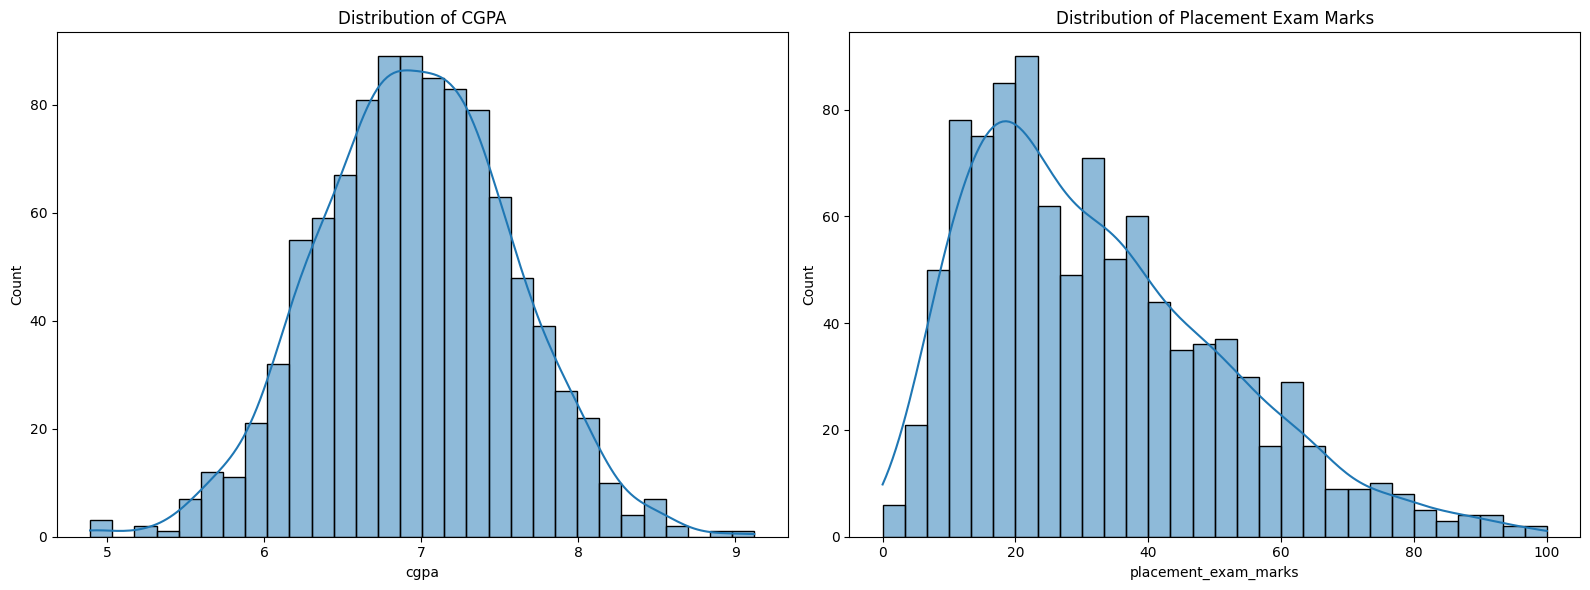

In [108]:
plt.figure(figsize=(16, 6))

# Plot for CGPA
plt.subplot(1, 2, 1)
sns.histplot(df['cgpa'], bins=30, kde=True)
plt.title('Distribution of CGPA')

# Plot for Placement Exam Marks
plt.subplot(1, 2, 2)
sns.histplot(df['placement_exam_marks'], bins=30, kde=True)
plt.title('Distribution of Placement Exam Marks')

plt.tight_layout()
plt.show()

Since, the distribution of placement_exam_marks is skewed(Right) so we can apply IQR Method to deal with them.

In [109]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

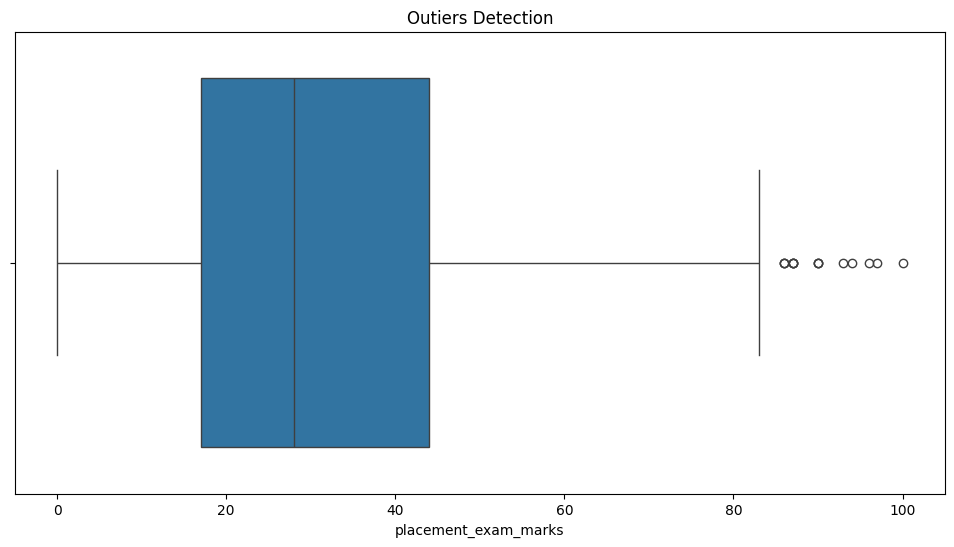

In [110]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['placement_exam_marks'])
plt.title("Outiers Detection")
plt.show()

## 1. Removing Outliers (Trimming)

In [111]:
# Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [112]:
print("Q1:", percentile25)
print("Q3:", percentile75)

Q1: 17.0
Q3: 44.0


In [113]:
iqr = percentile75 - percentile25
print("IQR:", iqr)

IQR: 27.0


In [114]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print("Lower Limit:", lower_limit)
print("Upper Limit:", upper_limit)

Lower Limit: -23.5
Upper Limit: 84.5


In [115]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [116]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [117]:
new_df = df[df['placement_exam_marks'] < upper_limit]
print(new_df.shape)

(985, 3)


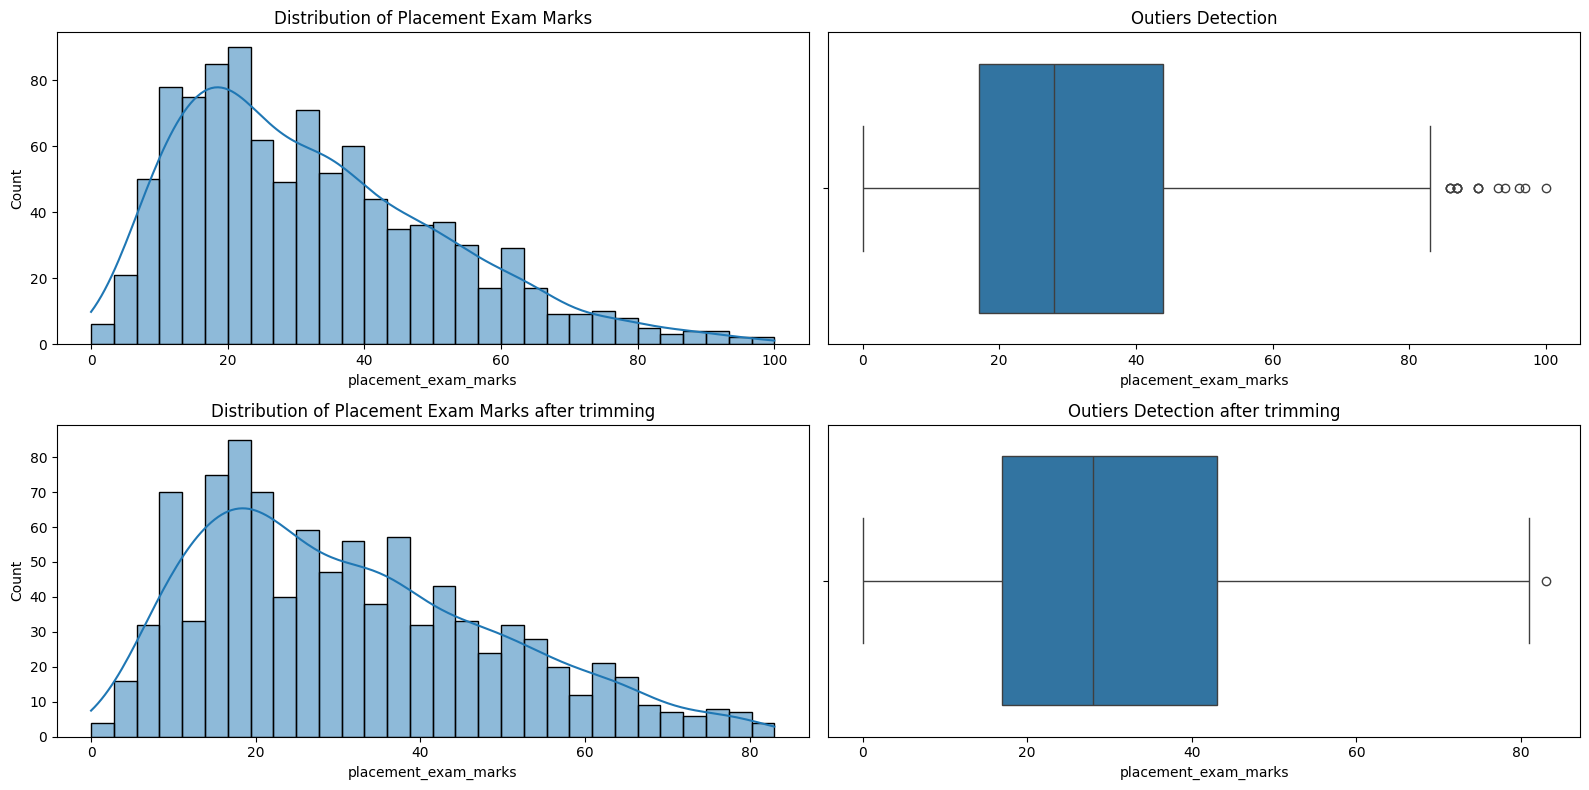

In [118]:
plt.figure(figsize=(16, 8))

# Plot for Placement Exam Marks
plt.subplot(2, 2, 1)
sns.histplot(df['placement_exam_marks'], bins=30, kde=True)
plt.title('Distribution of Placement Exam Marks')

# Outliers 
plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])
plt.title("Outiers Detection")

# Plot for Placement Exam Marks after trimming
plt.subplot(2, 2, 3)
sns.histplot(new_df['placement_exam_marks'], bins=30, kde=True)
plt.title('Distribution of Placement Exam Marks after trimming')

# Outliers 
plt.subplot(2, 2, 4)
sns.boxplot(x=new_df['placement_exam_marks'])
plt.title("Outiers Detection after trimming")

plt.tight_layout()
plt.show()

## 2. Imputing Outliers (Capping)

In [119]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [120]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

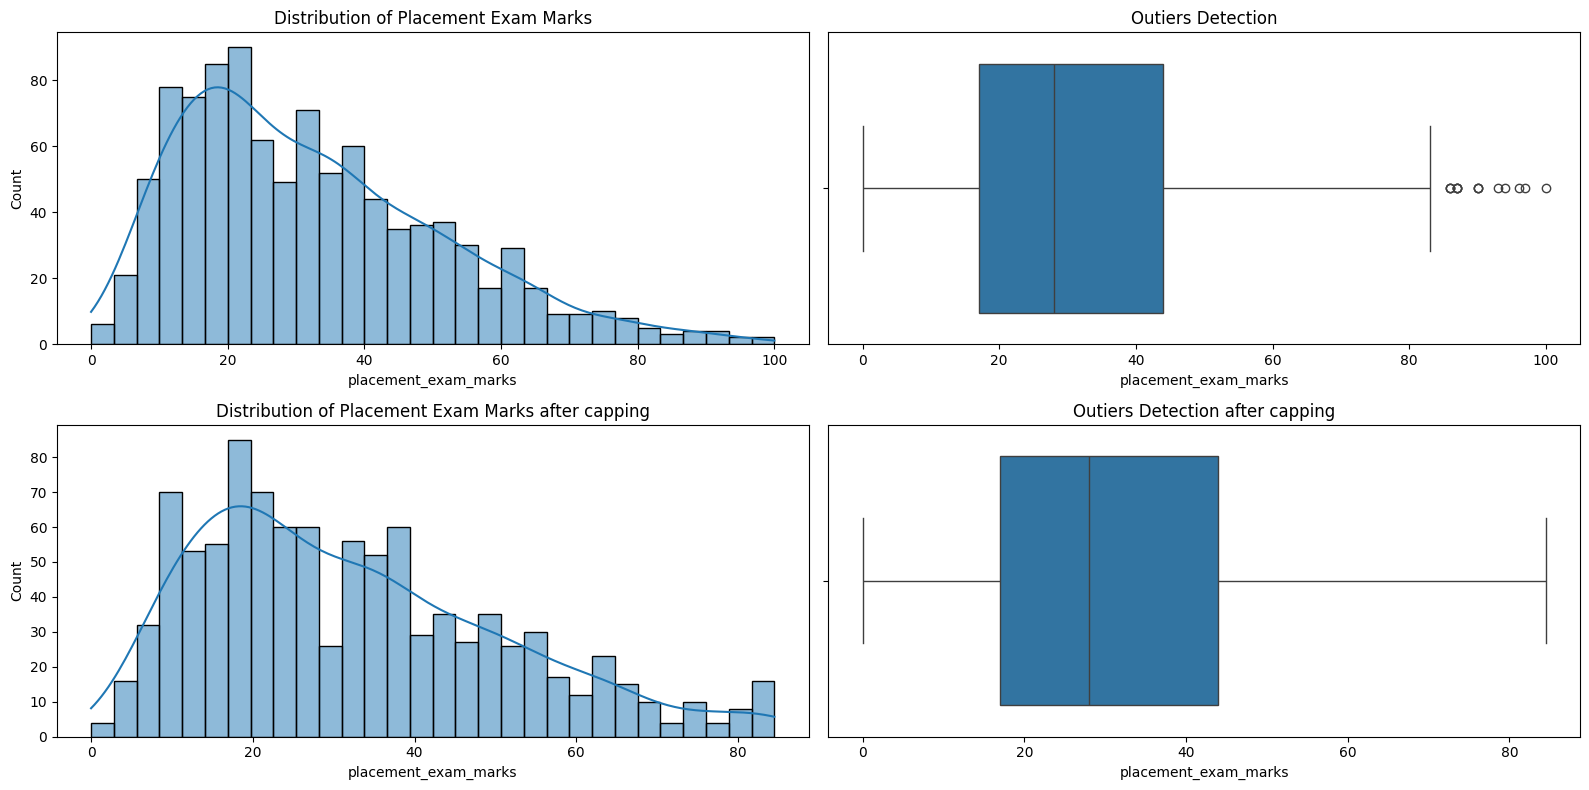

In [121]:
plt.figure(figsize=(16, 8))

# Plot for Placement Exam Marks
plt.subplot(2, 2, 1)
sns.histplot(df['placement_exam_marks'], bins=30, kde=True)
plt.title('Distribution of Placement Exam Marks')

# Outliers 
plt.subplot(2, 2, 2)
sns.boxplot(x=df['placement_exam_marks'])
plt.title("Outiers Detection")

# Plot for Placement Exam Marks after capping
plt.subplot(2, 2, 3)
sns.histplot(new_df_cap['placement_exam_marks'], bins=30, kde=True)
plt.title('Distribution of Placement Exam Marks after capping')

# Outliers 
plt.subplot(2, 2, 4)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.title("Outiers Detection after capping")

plt.tight_layout()
plt.show()